Install libraries:

pip install geopandas

pip install adjustText


In [75]:
%matplotlib inline

from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
from adjustText import adjust_text



In [76]:
!python --version

Python 3.8.10


In [77]:
import shapely
print(shapely.__version__)

2.0.1


In [78]:
print(gp.__version__)

0.10.2


In [79]:
print(matplotlib.__version__)

3.5.1


In [80]:
plt.rcParams.update({'axes.facecolor':'#00274C'})

In [81]:
df1 = pd.read_csv('./DATA/FCC/Fabric_BSL_07122023_rel_3_2/FCC_Active_BSL_07212023_rel_3_2.csv')

In [82]:
df1.drop(['address_primary', 'city', 'state', 'zip', 'zip_suffix'], axis=1, inplace=True)

In [83]:
df1.columns

Index(['location_id', 'unit_count', 'bsl_flag', 'building_type_code',
       'land_use_code', 'address_confidence_code', 'county_geoid',
       'block_geoid', 'h3_9', 'latitude', 'longitude', 'fcc_rel'],
      dtype='object')

In [88]:
ookla_df = gp.read_file('./DATA/OOKLA/OOKLA-mi-townships-2019q1-2021q4.shp')

In [89]:
ookla_df = gp.GeoDataFrame(ookla_df, crs="EPSG:4326")

In [175]:
ookla_df.columns

Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'index_righ', 'OBJECTID', 'FIPSCODE', 'FIPSNUM', 'NAME', 'LABEL',
       'TYPE', 'SQKM', 'SQMILES', 'ACRES', 'VER', 'LAYOUT', 'PENINSULA',
       'ShapeSTAre', 'ShapeSTLen', 'avg_d_mbps', 'avg_u_mbps', 'year_qtr',
       'geometry'],
      dtype='object')

In [90]:
ookla_df

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_righ,OBJECTID,FIPSCODE,FIPSNUM,...,ACRES,VER,LAYOUT,PENINSULA,ShapeSTAre,ShapeSTLen,avg_d_mbps,avg_u_mbps,year_qtr,geometry
0,0302232120200133,59495,12124,12,1,1,1444,1445,22000,22000,...,91473.809210,20,landscape,lower,3.701854e+08,131623.973836,59.495,12.124,2019q1,"POLYGON ((-82.93030 42.41129, -82.92480 42.411..."
1,0302232120022013,164958,128107,16,1040,10,1444,1445,22000,22000,...,91473.809210,20,landscape,lower,3.701854e+08,131623.973836,164.958,128.107,2019q1,"POLYGON ((-82.95227 42.45183, -82.94678 42.451..."
2,0302232031210000,38633,9455,26,36,5,1444,1445,22000,22000,...,91473.809210,20,landscape,lower,3.701854e+08,131623.973836,38.633,9.455,2019q1,"POLYGON ((-83.23242 42.42346, -83.22693 42.423..."
3,0302232031330231,33513,10034,23,1,1,1444,1445,22000,22000,...,91473.809210,20,landscape,lower,3.701854e+08,131623.973836,33.513,10.034,2019q1,"POLYGON ((-83.04016 42.33418, -83.03467 42.334..."
4,0302232031211001,56979,25698,9,7,4,1444,1445,22000,22000,...,91473.809210,20,landscape,lower,3.701854e+08,131623.973836,56.979,25.698,2019q1,"POLYGON ((-83.18298 42.42346, -83.17749 42.423..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838607,0302221033331310,2996,637,64,1,1,512,513,57480,57480,...,46515.892140,20,portrait,lower,1.882452e+08,58415.929306,2.996,0.637,2021q4,"POLYGON ((-85.79224 44.13491, -85.78674 44.134..."
838608,0302221213311310,35631,315,36,1,1,777,778,55060,55060,...,22972.999574,20,portrait,lower,9.296943e+07,38556.006836,35.631,0.315,2021q4,"POLYGON ((-85.79224 43.69171, -85.78674 43.691..."
838609,0302221132231321,34966,3808,715,1,1,174,175,77120,77120,...,22967.475893,20,portrait,lower,9.294708e+07,38561.273406,34.966,3.808,2021q4,"POLYGON ((-84.91882 44.12703, -84.91333 44.127..."
838610,0302203312233210,2563,2606,743,1,1,247,248,14300,14300,...,22553.881759,20,landscape,lower,9.127330e+07,38158.979024,2.563,2.606,2021q4,"POLYGON ((-84.93530 45.59867, -84.92981 45.598..."


In [91]:
df2 = pd.read_csv('./DATA/FCC/Fabric_BSL_07122023_rel_3_2/FCC_Active_NOBSL_07212023_rel_3_2.csv')

In [92]:
df2.drop(['address_primary', 'city', 'state', 'zip', 'zip_suffix'], axis=1, inplace=True)

In [93]:
result_df = pd.concat([df1, df2])

In [94]:
#result_df = result_df.drop(['address_primary', 'city', 'state', 'zip', 'zip_suffix'], axis=1)

In [95]:
result_df.columns

Index(['location_id', 'unit_count', 'bsl_flag', 'building_type_code',
       'land_use_code', 'address_confidence_code', 'county_geoid',
       'block_geoid', 'h3_9', 'latitude', 'longitude', 'fcc_rel'],
      dtype='object')

In [215]:
result_df.to_csv('./DATA/FCC/FCC_EUP_Fabric_BSL_07122023.csv')

In [216]:
FCC_EUP_BSL_df = pd.read_csv('./DATA/FCC/FCC_EUP_Fabric_BSL_07122023.csv')

In [217]:
FCC_EUP_BSL_df.columns

Index(['Unnamed: 0', 'location_id', 'unit_count', 'bsl_flag',
       'building_type_code', 'land_use_code', 'address_confidence_code',
       'county_geoid', 'block_geoid', 'h3_9', 'latitude', 'longitude',
       'fcc_rel', 'geometry'],
      dtype='object')

In [218]:
all_locations_df = gp.GeoDataFrame(
    FCC_EUP_BSL_df, crs=4326, geometry=gp.points_from_xy(FCC_EUP_BSL_df.longitude, FCC_EUP_BSL_df.latitude))

In [219]:
all_locations_df.to_pickle('./DATA/results/gdf_all_locations.pkl')

In [220]:
all_locations_df.to_file('./DATA/results/all_locations.shp', driver='ESRI Shapefile')


/tmp/ipykernel_182/3389400805.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  all_locations_df.to_file('./DATA/results/all_locations.shp', driver='ESRI Shapefile')


36414 : Total Number of locations in FCC Broadband Servicaable Location Fabric for EUP


<AxesSubplot:>

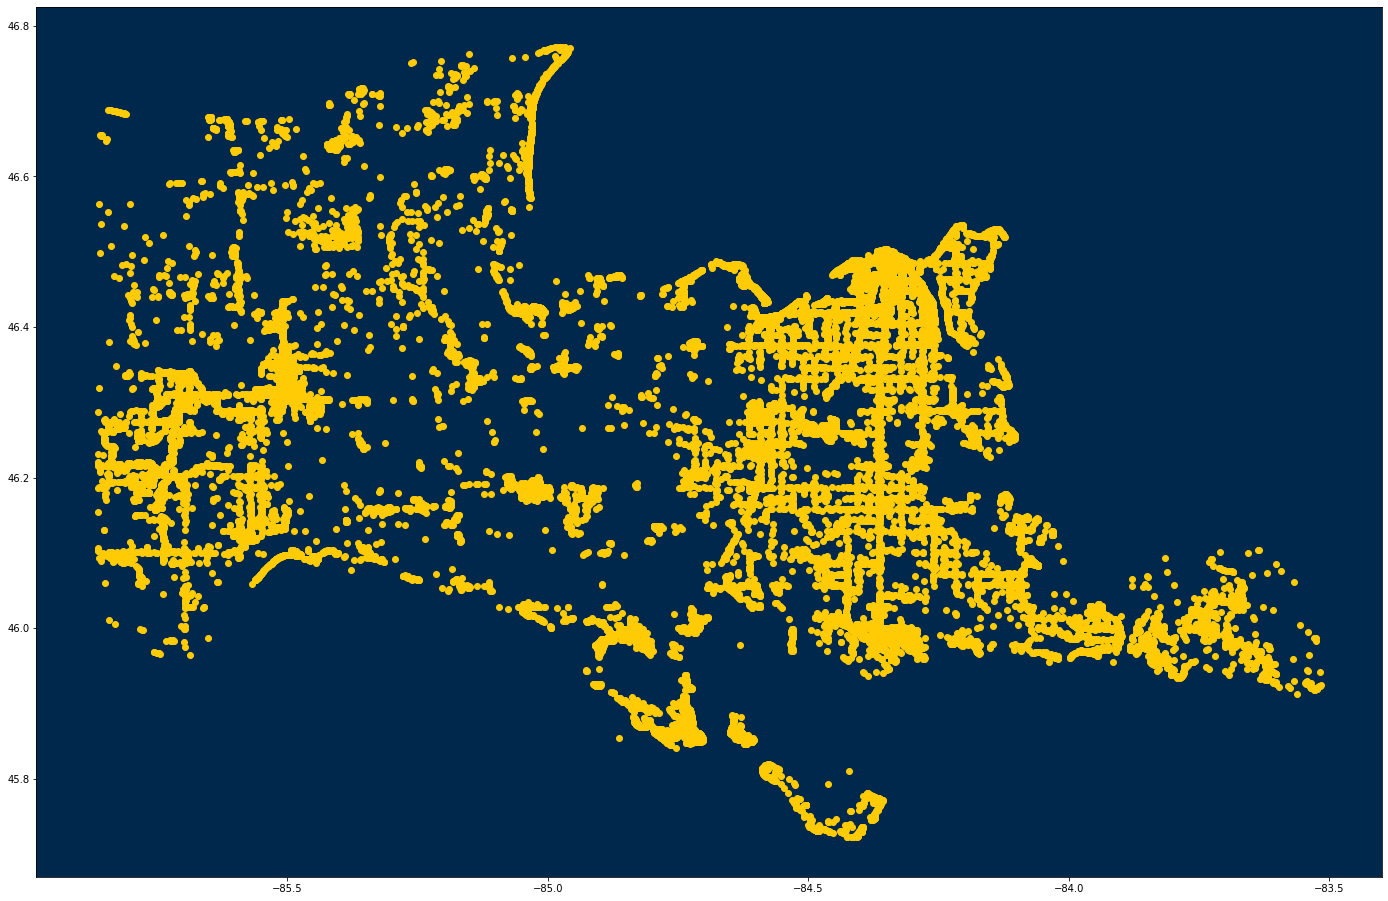

In [221]:
print(len(all_locations_df), ": Total Number of locations in FCC Broadband Servicaable Location Fabric for EUP")
all_locations_df.plot(figsize=(32,16), color='#FFCB05')




In [222]:
FCC_MI_USUF = pd.read_csv('./DATA/FCC/MI_unserved_unfunded_20230831.csv')

In [223]:
len(FCC_MI_USUF)

1282998

In [224]:
FCC_MI_USUF.columns

Index(['location_id', 'block_geoid', 'h3_res8_id', 'wired_dl25_ul3_r',
       'wired_dl100_ul20_r', 'terrestrial_dl25_ul3_r',
       'terrestrial_dl100_ul20_r', 'wiredlfw_dl25_ul3_r',
       'wiredlfw_dl100_ul20_r', 'wired_dl25_ul3_b', 'wired_dl100_ul20_b',
       'terrestrial_dl25_ul3_b', 'terrestrial_dl100_ul20_b',
       'wiredlfw_dl25_ul3_b', 'wiredlfw_dl100_ul20_b'],
      dtype='object')

In [225]:
merged_df = pd.merge(FCC_EUP_BSL_df, FCC_MI_USUF, how='inner', on='location_id')

In [226]:
len(merged_df)

16952

In [227]:
#Add geomety to merged data Frame
usuf_location_df = gp.GeoDataFrame(
    merged_df, crs=4326, geometry=gp.points_from_xy(merged_df.longitude, merged_df.latitude))

In [228]:
usuf_location_df.columns

Index(['Unnamed: 0', 'location_id', 'unit_count', 'bsl_flag',
       'building_type_code', 'land_use_code', 'address_confidence_code',
       'county_geoid', 'block_geoid_x', 'h3_9', 'latitude', 'longitude',
       'fcc_rel', 'geometry', 'block_geoid_y', 'h3_res8_id',
       'wired_dl25_ul3_r', 'wired_dl100_ul20_r', 'terrestrial_dl25_ul3_r',
       'terrestrial_dl100_ul20_r', 'wiredlfw_dl25_ul3_r',
       'wiredlfw_dl100_ul20_r', 'wired_dl25_ul3_b', 'wired_dl100_ul20_b',
       'terrestrial_dl25_ul3_b', 'terrestrial_dl100_ul20_b',
       'wiredlfw_dl25_ul3_b', 'wiredlfw_dl100_ul20_b'],
      dtype='object')

In [176]:
usuf_location_df.head()

,location_id,unit_count,bsl_flag,building_type_code,land_use_code,address_confidence_code,county_geoid,block_geoid_x,h3_9,latitude,...,terrestrial_dl25_ul3_r,terrestrial_dl100_ul20_r,wiredlfw_dl25_ul3_r,wiredlfw_dl100_ul20_r,wired_dl25_ul3_b,wired_dl100_ul20_b,terrestrial_dl25_ul3_b,terrestrial_dl100_ul20_b,wiredlfw_dl25_ul3_b,wiredlfw_dl100_ul20_b
0,1293513475,1,True,R,1,2,26033,260339707001001,8927630b1cfffff,46.680417,...,U,U,U,U,U,U,U,U,U,U
1,1293513499,1,True,R,1,2,26033,260339707001001,8927630b567ffff,46.688547,...,U,U,U,U,U,U,U,U,U,U
2,1293513569,1,True,R,1,2,26033,260339707001042,8927630b52bffff,46.688787,...,U,U,U,U,U,U,U,U,U,U
3,1293513490,1,True,B,2,2,26033,260339707001027,8927630b573ffff,46.692062,...,U,U,U,U,U,U,U,U,U,U
4,1293513492,1,True,R,1,2,26033,260339707001027,8927630b573ffff,46.693819,...,U,U,U,U,U,U,U,U,U,U


In [104]:
usuf_location_df.to_pickle('./DATA/results/gdf_usuf_location_df.pkl')

In [105]:
usuf_location_df.to_file('./DATA/results/usuf_location_df.shp', driver='ESRI Shapefile')

/tmp/ipykernel_182/3000055229.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  usuf_location_df.to_file('./DATA/results/usuf_location_df.shp', driver='ESRI Shapefile')


16952 : Number of Broadband Serviceable Locations in EUP Classified as Unserved and / or Unfunded by FCC Funding Data Map


<AxesSubplot:>

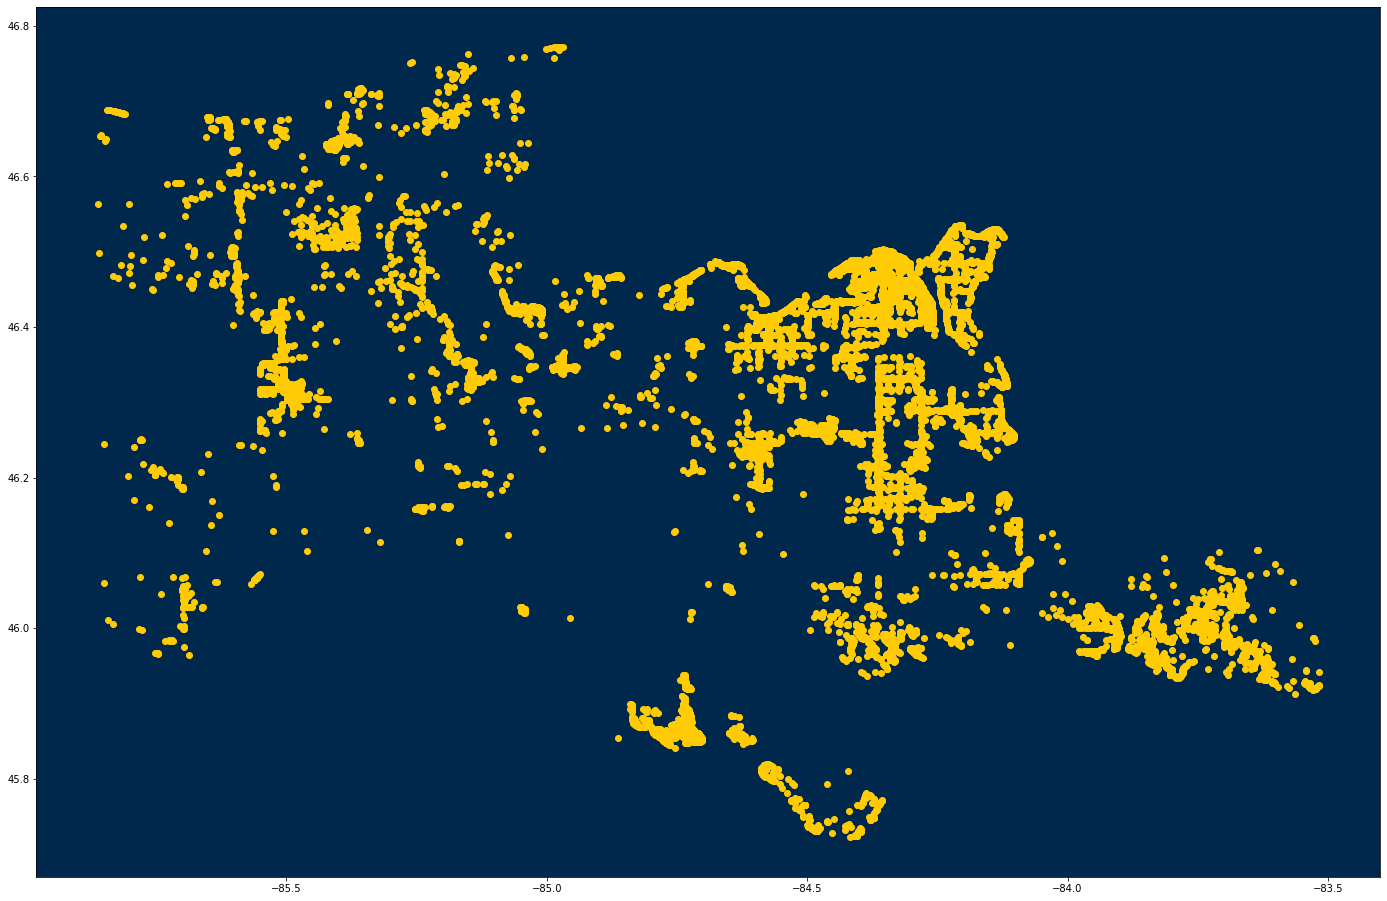

In [161]:
print(len(usuf_location_df), ': Number of Broadband Serviceable Locations in EUP Classified as Unserved and / or Unfunded by FCC Funding Data Map')

usuf_location_df.plot(figsize=(32,16), color='#FFCB05')

In [229]:

#open MI Survey Sections

eup_sections = gp.read_file('./DATA/MI/Sections-Counties-17-48-49/Public_Land_Survey_Sections.shp')

In [230]:
eup_sections.columns

Index(['OBJECTID_1', 'OBJECTID', 'michigan_M', 'PERIMETER', 'TOWN', 'RANGE',
       'SECTION', 'SEC', 'TWNRNG', 'TWNRNGSEC', 'CLAIM', 'GOVLOT', 'OTHER',
       'COUNTY', 'Shape_STAr', 'Shape_STLe', 'Shape_ST_1', 'Shape_ST_2',
       'Shape_ST_3', 'Shape_ST_4', 'ShapeSTAre', 'ShapeSTLen', 'geometry'],
      dtype='object')

In [109]:
eup_sections.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

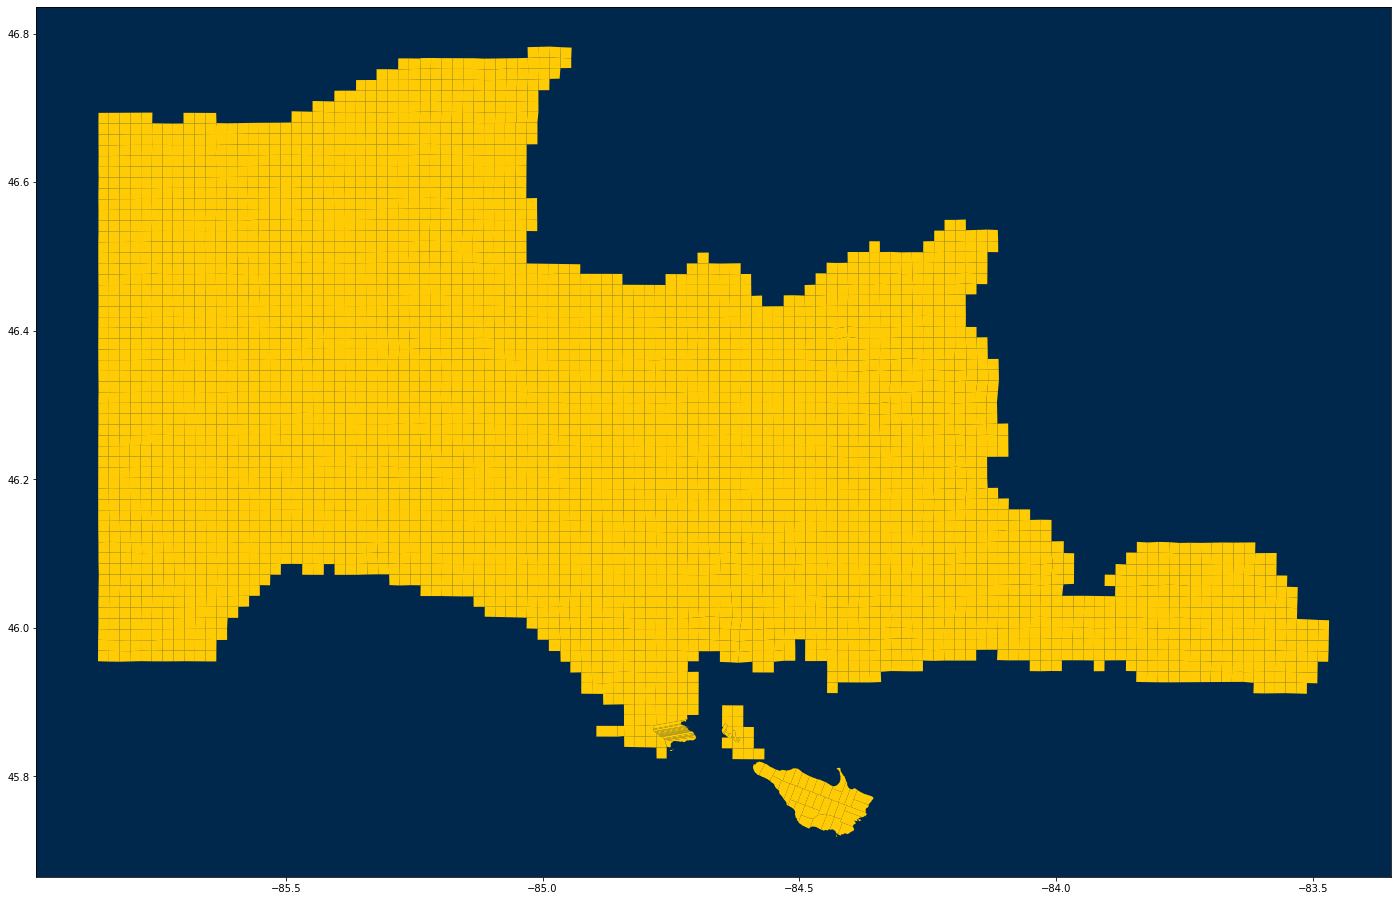

In [164]:
eup_sections.plot(figsize=(32,16), color='#FFCB05')

# Develop training data for supervised learning

In [267]:
EUP_trs_df = eup_sections['TWNRNGSEC'].to_frame('TWNRNGSEC')

In [268]:
EUP_trs_df

,TWNRNGSEC
0,51N06W36
1,51N05W31
2,51N06W35
3,51N05W32
4,50N06W01
...,...
4039,40N04W22
4040,40N04W23
4041,40N03W25
4042,40N04W26


In [257]:
bsl_locations_in_sections = gp.sjoin(eup_sections, all_locations_df, how="right", predicate='intersects')
len(bsl_locations_in_sections)

36414

In [258]:
len(bsl_locations_in_sections['TWNRNGSEC'].unique())

2098

In [260]:
grouped_bsl = bsl_locations_in_sections.groupby('TWNRNGSEC')
countbysection_bsl_locations = grouped_bsl.count()
countbysection_bsl_locations = countbysection_bsl_locations['location_id']
bsl_count_df = countbysection_bsl_locations.sort_values(ascending=False).to_frame('bslcount')
bsl_count_df

,bslcount
TWNRNGSEC,
47N01E07,1342
47N01E06,847
47N01E08,584
47N01E05,581
45N01W29,543
...,...
47N01W02,1
42N06E23,1
42N06E24,1


In [231]:
#locations_in_sections = gp.sjoin(usuf_location_df, eup_sections, how="inner", predicate='intersects')

usuf_locations_in_sections = gp.sjoin(eup_sections, usuf_location_df, how="right", predicate='intersects')

In [232]:
usuf_locations_in_sections.columns

Index(['index_left', 'OBJECTID_1', 'OBJECTID', 'michigan_M', 'PERIMETER',
       'TOWN', 'RANGE', 'SECTION', 'SEC', 'TWNRNG', 'TWNRNGSEC', 'CLAIM',
       'GOVLOT', 'OTHER', 'COUNTY', 'Shape_STAr', 'Shape_STLe', 'Shape_ST_1',
       'Shape_ST_2', 'Shape_ST_3', 'Shape_ST_4', 'ShapeSTAre', 'ShapeSTLen',
       'Unnamed: 0', 'location_id', 'unit_count', 'bsl_flag',
       'building_type_code', 'land_use_code', 'address_confidence_code',
       'county_geoid', 'block_geoid_x', 'h3_9', 'latitude', 'longitude',
       'fcc_rel', 'geometry', 'block_geoid_y', 'h3_res8_id',
       'wired_dl25_ul3_r', 'wired_dl100_ul20_r', 'terrestrial_dl25_ul3_r',
       'terrestrial_dl100_ul20_r', 'wiredlfw_dl25_ul3_r',
       'wiredlfw_dl100_ul20_r', 'wired_dl25_ul3_b', 'wired_dl100_ul20_b',
       'terrestrial_dl25_ul3_b', 'terrestrial_dl100_ul20_b',
       'wiredlfw_dl25_ul3_b', 'wiredlfw_dl100_ul20_b'],
      dtype='object')

In [233]:
#usuf_locations_in_sections.to_pickle('./DATA/results/gdf_locations_in_sections.pkl')

In [235]:
usuf_locations_in_sections.to_file('./DATA/results/gdf_usuf_locations_in_sections.shp', driver='ESRI Shapefile')

/tmp/ipykernel_182/3598364648.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  usuf_locations_in_sections.to_file('./DATA/results/gdf_usuf_locations_in_sections.shp', driver='ESRI Shapefile')


In [236]:
len(usuf_locations_in_sections)

16952

In [237]:
len(usuf_locations_in_sections['TWNRNGSEC'].unique())

1210

In [256]:
grouped_usuf = usuf_locations_in_sections.groupby('TWNRNGSEC')
countbysection_ufus_locations = grouped_usuf.count()
countbysection_ufus_locations = countbysection_ufus_locations['location_id']
usuf_count_df = countbysection_ufus_locations.sort_values(ascending=False).to_frame('usufcount')
usuf_count_df

,usufcount
TWNRNGSEC,
47N01E07,870
47N01E06,431
47N01E08,431
47N01E05,371
45N01W29,325
...,...
44N03W02,1
47N07W30,1
47N07W17,1


In [264]:
merged_counts = bsl_count_df.merge(usuf_count_df, left_on='TWNRNGSEC', right_on='TWNRNGSEC', how='outer')
merged_counts

,bslcount,usufcount
TWNRNGSEC,,
47N01E07,1342,870.0
47N01E06,847,431.0
47N01E08,584,431.0
47N01E05,581,371.0
45N01W29,543,325.0
...,...,...
47N01W02,1,NaN
42N06E23,1,1.0
42N06E24,1,NaN


In [272]:
EUP_loc_counts = merged_counts.merge(EUP_trs_df, left_on='TWNRNGSEC', right_on='TWNRNGSEC', how='outer')

## Add labels to training data

In [275]:
# labels.csv has the lables from the unsupervised learning project

labels_df = pd.read_csv('./DATA/results/labels.csv')

In [276]:
labels_df

,TWNRNGSEC,avg_d_mbps,avg_u_mbps,avg_lat_ms,cluster_labels
0,40N02W18,19.708444,1.557111,60.222222,0
1,40N02W19,31.219852,4.015037,60.555556,0
2,40N03W,49.258286,12.611013,44.359580,1
3,40N03W02,51.946333,8.033333,68.333333,0
4,40N03W06,88.839830,10.249955,26.011364,1
...,...,...,...,...,...
1157,50N09W25,36.858000,2.228000,643.000000,2
1158,50N09W26,36.858000,2.228000,643.000000,2
1159,50N12W32,7.042000,1.058000,22.000000,0
1160,51N05W31,204.484286,19.825429,54.142857,1


In [342]:
total_df = EUP_loc_counts.merge(labels_df, left_on='TWNRNGSEC', right_on='TWNRNGSEC', how='outer').dropna()

In [343]:
#train_df.dropna(subset=['bslcount', 'usufcount'], inplace=True)

In [344]:
total_df

,TWNRNGSEC,bslcount,usufcount,avg_d_mbps,avg_u_mbps,avg_lat_ms,cluster_labels
0,47N01E07,1342.0,870.0,120.343040,12.107076,27.006601,1.0
1,47N01E06,847.0,431.0,116.595788,11.714901,26.358491,1.0
2,47N01E08,584.0,431.0,121.552481,12.842681,26.214286,1.0
3,47N01E05,581.0,371.0,112.081817,25.232495,23.163366,1.0
4,45N01W29,543.0,325.0,133.562899,13.284333,26.753623,1.0
...,...,...,...,...,...,...,...
2057,42N11W21,1.0,1.0,17.775000,2.792000,26.000000,0.0
2081,44N02E01,1.0,1.0,9.796000,7.664000,62.000000,0.0
2086,42N05E10,1.0,1.0,48.723857,13.215571,50.571429,1.0
2087,42N05E12,1.0,1.0,13.754000,1.387000,475.500000,2.0


In [345]:
total_df['percent_usuf'] = (total_df['usufcount'] / total_df['bslcount']).fillna(0)

In [346]:
total_df = total_df.astype({'bslcount': 'int', 'usufcount': 'int', 'cluster_labels': 'int'})

In [347]:
total_df = total_df[['TWNRNGSEC', 'bslcount', 'usufcount', 'percent_usuf', 'avg_d_mbps', 'avg_u_mbps',
       'avg_lat_ms', 'cluster_labels']]

In [348]:
total_df

,TWNRNGSEC,bslcount,usufcount,percent_usuf,avg_d_mbps,avg_u_mbps,avg_lat_ms,cluster_labels
0,47N01E07,1342,870,0.648286,120.343040,12.107076,27.006601,1
1,47N01E06,847,431,0.508855,116.595788,11.714901,26.358491,1
2,47N01E08,584,431,0.738014,121.552481,12.842681,26.214286,1
3,47N01E05,581,371,0.638554,112.081817,25.232495,23.163366,1
4,45N01W29,543,325,0.598527,133.562899,13.284333,26.753623,1
...,...,...,...,...,...,...,...,...
2057,42N11W21,1,1,1.000000,17.775000,2.792000,26.000000,0
2081,44N02E01,1,1,1.000000,9.796000,7.664000,62.000000,0
2086,42N05E10,1,1,1.000000,48.723857,13.215571,50.571429,1
2087,42N05E12,1,1,1.000000,13.754000,1.387000,475.500000,2


In [350]:
total_df.to_csv('./DATA/results/total.csv')

<AxesSubplot:>

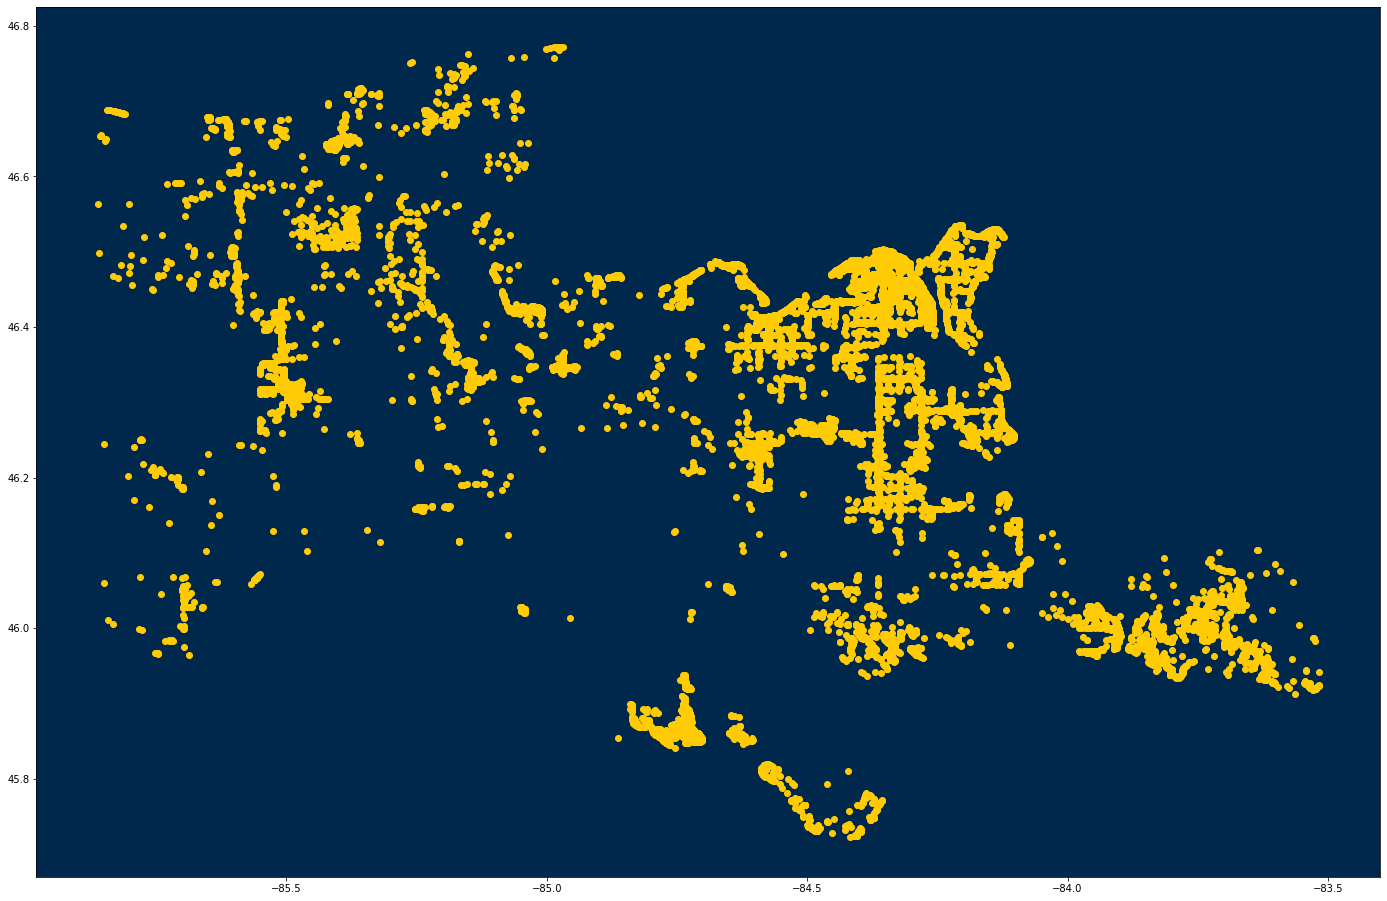

In [205]:
locations_in_sections.plot(figsize=(32,16), color='#FFCB05')

In [118]:
sections_with_network = gp.sjoin(eup_sections, ookla_df, how="inner", predicate='intersects')

In [119]:
sections_with_network.columns

Index(['OBJECTID_1', 'OBJECTID_left', 'michigan_M', 'PERIMETER', 'TOWN',
       'RANGE', 'SECTION', 'SEC', 'TWNRNG', 'TWNRNGSEC', 'CLAIM', 'GOVLOT',
       'OTHER', 'COUNTY', 'Shape_STAr', 'Shape_STLe', 'Shape_ST_1',
       'Shape_ST_2', 'Shape_ST_3', 'Shape_ST_4', 'ShapeSTAre_left',
       'ShapeSTLen_left', 'geometry', 'index_right', 'quadkey', 'avg_d_kbps',
       'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices', 'index_righ',
       'OBJECTID_right', 'FIPSCODE', 'FIPSNUM', 'NAME', 'LABEL', 'TYPE',
       'SQKM', 'SQMILES', 'ACRES', 'VER', 'LAYOUT', 'PENINSULA',
       'ShapeSTAre_right', 'ShapeSTLen_right', 'avg_d_mbps', 'avg_u_mbps',
       'year_qtr'],
      dtype='object')

In [120]:
sections_with_network.to_file('./DATA/results/sections_with_network.shp', driver='ESRI Shapefile')

/tmp/ipykernel_182/948633307.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sections_with_network.to_file('./DATA/results/sections_with_network.shp', driver='ESRI Shapefile')


In [121]:
sections_with_network.to_pickle('./DATA/results/gdf_sections_with_network.pkl')

<AxesSubplot:>

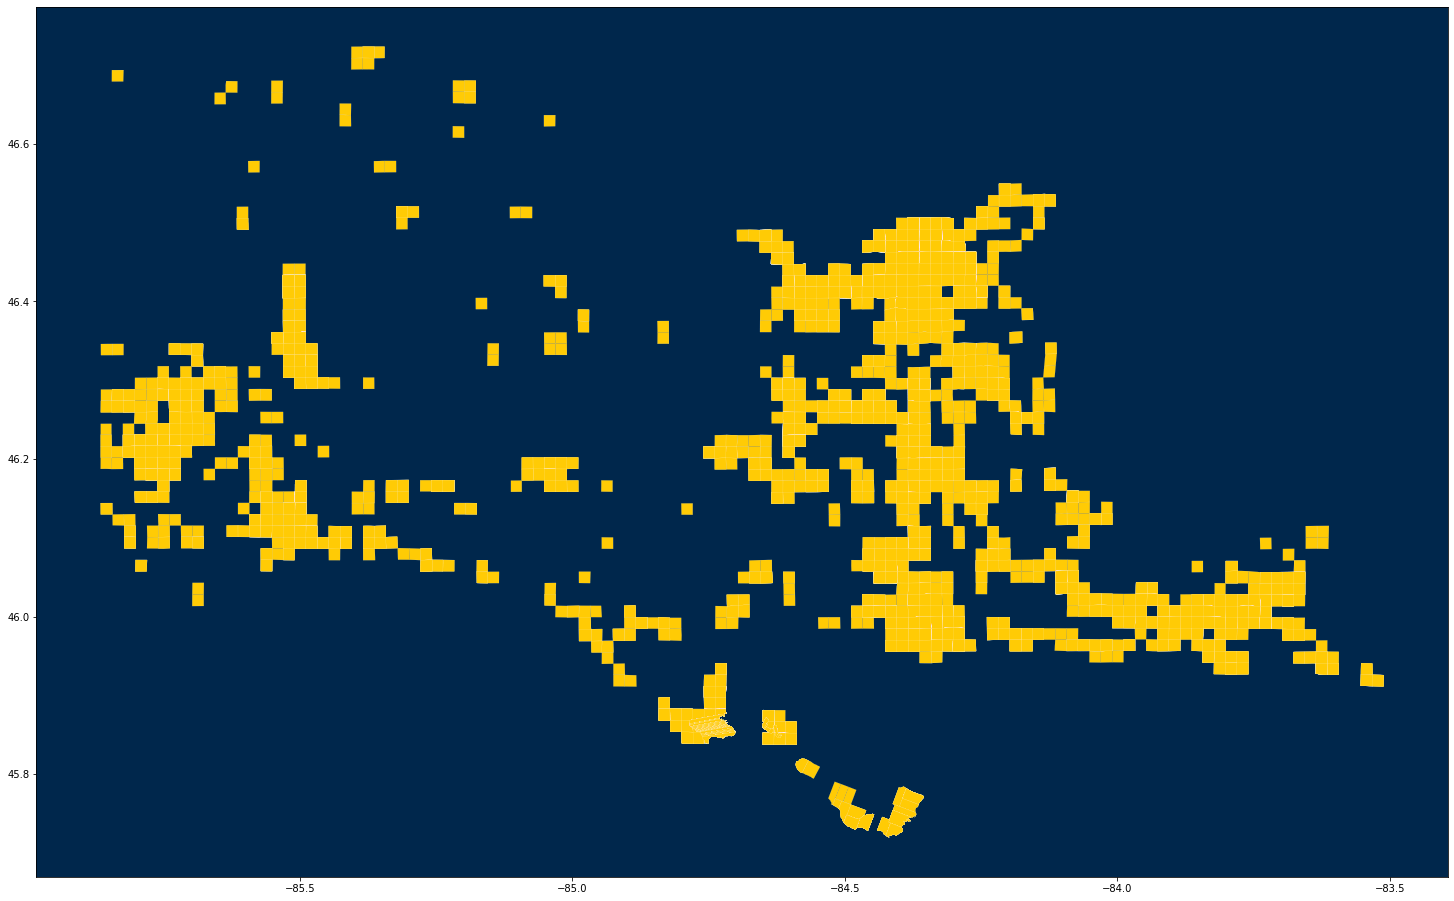

In [166]:
sections_with_network.plot(figsize=(40,16), color='#FFCB05', edgecolor='white', linewidth=0.1)

In [123]:
locations_in_sections.columns

Index(['OBJECTID_1', 'OBJECTID', 'michigan_M', 'PERIMETER', 'TOWN', 'RANGE',
       'SECTION', 'SEC', 'TWNRNG', 'TWNRNGSEC', 'CLAIM', 'GOVLOT', 'OTHER',
       'COUNTY', 'Shape_STAr', 'Shape_STLe', 'Shape_ST_1', 'Shape_ST_2',
       'Shape_ST_3', 'Shape_ST_4', 'ShapeSTAre', 'ShapeSTLen', 'geometry',
       'index_right', 'location_id', 'unit_count', 'bsl_flag',
       'building_type_code', 'land_use_code', 'address_confidence_code',
       'county_geoid', 'block_geoid_x', 'h3_9', 'latitude', 'longitude',
       'fcc_rel', 'block_geoid_y', 'h3_res8_id', 'wired_dl25_ul3_r',
       'wired_dl100_ul20_r', 'terrestrial_dl25_ul3_r',
       'terrestrial_dl100_ul20_r', 'wiredlfw_dl25_ul3_r',
       'wiredlfw_dl100_ul20_r', 'wired_dl25_ul3_b', 'wired_dl100_ul20_b',
       'terrestrial_dl25_ul3_b', 'terrestrial_dl100_ul20_b',
       'wiredlfw_dl25_ul3_b', 'wiredlfw_dl100_ul20_b'],
      dtype='object')

<AxesSubplot:>

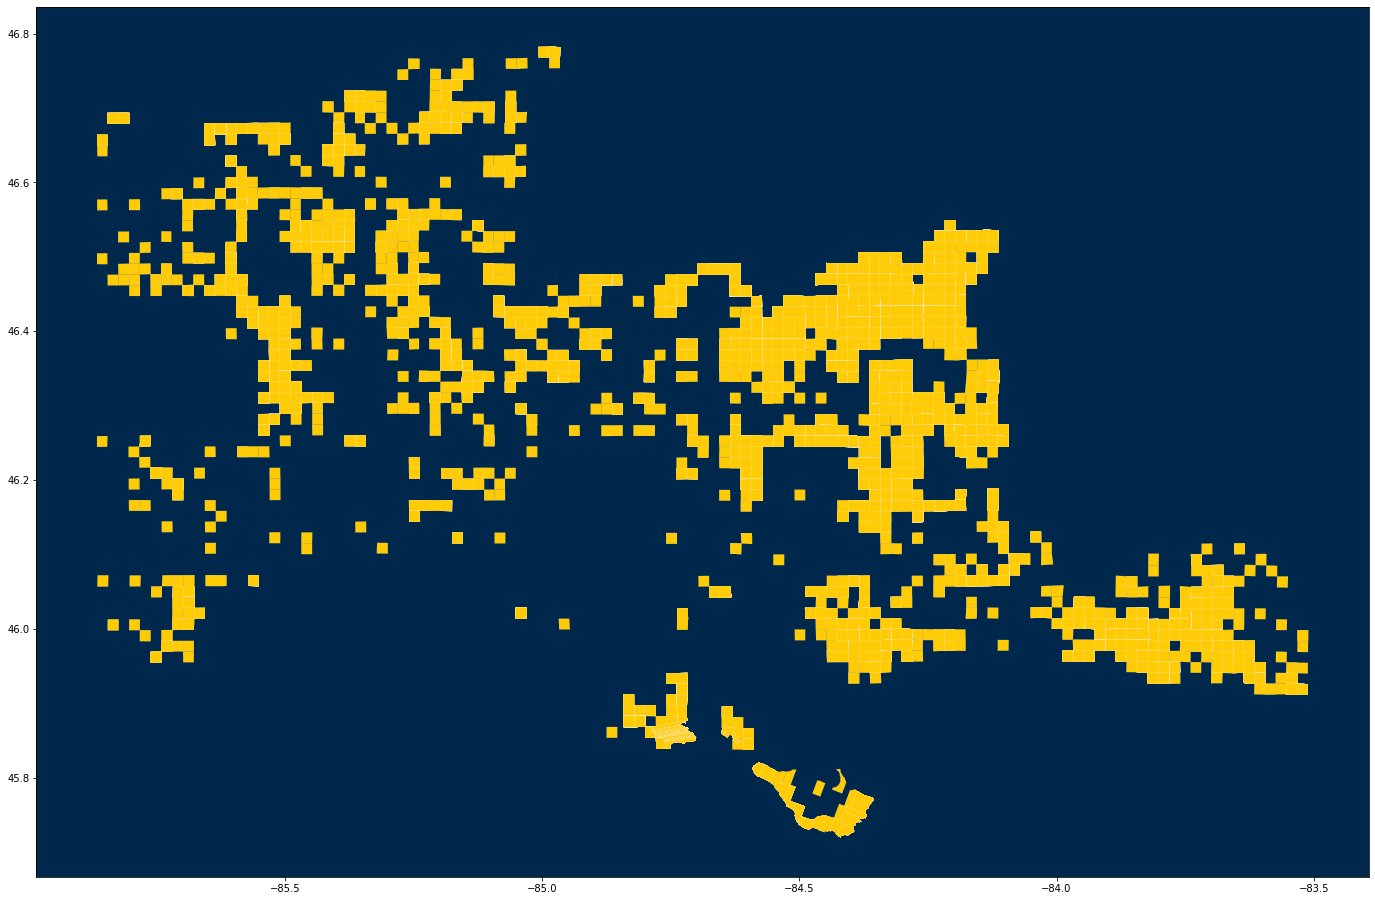

In [167]:
locations_in_sections.plot(figsize=(40,16), color='#FFCB05', edgecolor='white', linewidth=0.1)

In [125]:
locations_in_sections

,OBJECTID_1,OBJECTID,michigan_M,PERIMETER,TOWN,RANGE,SECTION,SEC,TWNRNG,TWNRNGSEC,...,terrestrial_dl25_ul3_r,terrestrial_dl100_ul20_r,wiredlfw_dl25_ul3_r,wiredlfw_dl100_ul20_r,wired_dl25_ul3_b,wired_dl100_ul20_b,terrestrial_dl25_ul3_b,terrestrial_dl100_ul20_b,wiredlfw_dl25_ul3_b,wiredlfw_dl100_ul20_b
0,2570,2570,0,6485.97772,51N,06W,36,36,51N06W,51N06W36,...,U,U,U,U,U,U,U,U,U,U
0,2570,2570,0,6485.97772,51N,06W,36,36,51N06W,51N06W36,...,U,U,U,U,U,U,U,U,U,U
0,2570,2570,0,6485.97772,51N,06W,36,36,51N06W,51N06W36,...,U,U,U,U,U,U,U,U,U,U
1,2571,2571,0,6458.82090,51N,05W,31,31,51N05W,51N05W31,...,U,U,U,U,U,U,U,U,U,U
1,2571,2571,0,6458.82090,51N,05W,31,31,51N05W,51N05W31,...,U,U,U,U,U,U,U,U,U,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,18159,18159,0,6159.51256,40N,04W,23,23,40N04W,40N04W23,...,C,C,C,C,U,U,U,U,U,U
4040,18159,18159,0,6159.51256,40N,04W,23,23,40N04W,40N04W23,...,C,C,C,C,U,U,U,U,U,U
4040,18159,18159,0,6159.51256,40N,04W,23,23,40N04W,40N04W23,...,U,U,U,U,C,C,C,C,C,C
4040,18159,18159,0,6159.51256,40N,04W,23,23,40N04W,40N04W23,...,C,C,C,C,U,U,U,U,U,U


In [126]:
mlab_d_df = pd.read_csv('./DATA/MLABS/DownloadTests-010119-100123.csv')

In [127]:
from shapely import wkt
mlab_d_df.rename(columns={"geometry": "wkt"}, inplace=True)
mlab_d_df['geometry'] = mlab_d_df['wkt'].apply(wkt.loads)
#gdf = gpd.GeoDataFrame(df, crs='epsg:4326')

In [128]:
mlab_d_df = gp.GeoDataFrame(mlab_d_df, crs='epsg:4326')


In [129]:
mlab_d_df.columns

Index(['id', 'TestTime', 'Latitude', 'Longitude', 'wkt', 'DownMeanMbps',
       'DownminRTT', 'geometry'],
      dtype='object')

In [130]:
mlab_d_df.drop(['Latitude', 'Longitude', 'wkt'], axis=1, inplace=True)

In [131]:
mlab_d_df

,id,TestTime,DownMeanMbps,DownminRTT,geometry
0,lYektYZCb0G5JEwceOUlxA,2019-11-20 06:06:26.155254 UTC,4.159672,27.000,POINT (-84.21230 45.33650)
1,U2czRKYAU1gXpwn2qPzzMw,2019-11-20 06:05:40.499908 UTC,17.379948,6.000,POINT (-84.21230 45.33650)
2,6K3evuv60ZfieeNb_F6HZA,2019-11-09 17:42:23.618899 UTC,1.945856,85.000,POINT (-85.26730 45.07480)
3,A6hi_noxg2xHhAG19gCyAw,2019-11-09 06:08:02.265106 UTC,9.590369,6.000,POINT (-84.21230 45.33650)
4,T8dpGLfb-_USmkLtgisfPA,2019-11-09 17:32:37.569563 UTC,7.255742,22.000,POINT (-84.79240 45.44050)
...,...,...,...,...,...
631656,ndt-d2dj7_1667103700_0000000000305181,2022-12-18 15:53:43.307638 UTC,52.726673,8.940,POINT (-85.22450 45.26440)
631657,ndt-8k7vk_1667000282_000000000032B74A,2022-12-18 16:20:25.936298 UTC,198.593264,12.539,POINT (-85.22450 45.26440)
631658,ndt-8k7vk_1667000282_000000000032AEC5,2022-12-18 15:30:32.183699 UTC,169.238676,12.000,POINT (-85.22450 45.26440)
631659,ndt-kt8ph_1666991603_000000000033EE69,2022-12-18 17:44:19.155316 UTC,16.624732,12.778,POINT (-85.22450 45.26440)


In [172]:
#mlab_d_df.plot(figsize=(40,16), color='#FFCB05', edgecolor='white', linewidth=0.1)

In [170]:
sections_with_mlab_download = gp.sjoin(mlab_d_df, eup_sections, how="inner", predicate='intersects')

In [173]:
len(sections_with_mlab_download)

109182

In [174]:
sections_with_mlab_download['DownMeanMbps'].mean()

92.5338282065727

<AxesSubplot:>

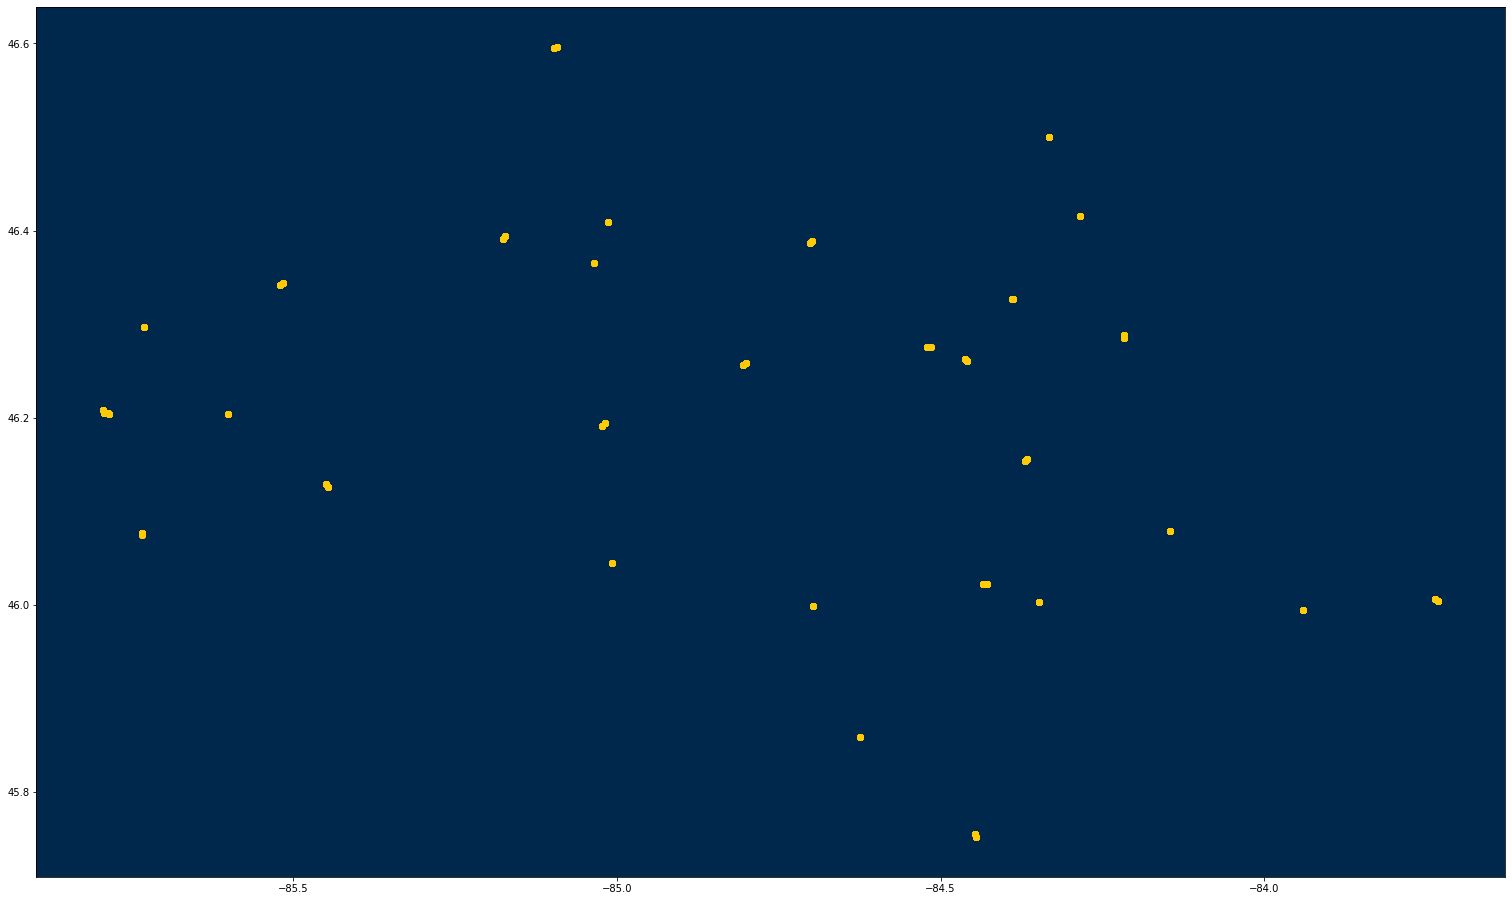

In [171]:
sections_with_mlab_download.plot(figsize=(32,16), color='#FFCB05')

In [134]:
sections_with_mlab_download.to_file('./DATA/MLABS/sections_with_mlab_download_010119-100123.shp', driver='ESRI Shapefile')

/tmp/ipykernel_182/1174176307.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sections_with_mlab_download.to_file('./DATA/MLABS/sections_with_mlab_download_010119-100123.shp', driver='ESRI Shapefile')


In [135]:
mlab_u_df = pd.read_csv('./DATA/MLABS/UploadSample-010119-100123.csv')

In [136]:
mlab_u_df.rename(columns={"geometry": "wkt"}, inplace=True)
mlab_u_df['geometry'] = mlab_u_df['wkt'].apply(wkt.loads)
mlab_u_df = gp.GeoDataFrame(mlab_u_df, crs='epsg:4326')
#mlab_u_df.drop(['wkt', 'SubdivisionName'], axis=1, inplace=True)
mlab_u_df.columns

Index(['UUID', 'UpMeanMbps', 'UpminRTT', 'wkt', 'Subdivision1Name',
       'geometry'],
      dtype='object')

In [137]:
mlab_u_df.drop(['wkt', 'Subdivision1Name'], axis=1, inplace=True)

In [138]:
sections_with_mlab_upload = gp.sjoin(eup_sections, mlab_u_df, how="inner", predicate='contains')

In [139]:
sections_with_mlab_upload

,OBJECTID_1,OBJECTID,michigan_M,PERIMETER,TOWN,RANGE,SECTION,SEC,TWNRNG,TWNRNGSEC,...,Shape_ST_2,Shape_ST_3,Shape_ST_4,ShapeSTAre,ShapeSTLen,geometry,index_right,UUID,UpMeanMbps,UpminRTT
330,4622,4622,0,6455.55293,49N,06W,32,32,49N06W,49N06W32,...,9395.979267,5.516458e+06,9395.979267,5.516458e+06,9395.979267,"POLYGON ((-85.07334 46.60736, -85.07351 46.600...",71148,ndt-c8dt7_1659602490_0000000000097F27,19.417337,23.997
330,4622,4622,0,6455.55293,49N,06W,32,32,49N06W,49N06W32,...,9395.979267,5.516458e+06,9395.979267,5.516458e+06,9395.979267,"POLYGON ((-85.07334 46.60736, -85.07351 46.600...",62693,ndt-mghd8_1658449664_000000000007995B,9.871565,20.005
330,4622,4622,0,6455.55293,49N,06W,32,32,49N06W,49N06W32,...,9395.979267,5.516458e+06,9395.979267,5.516458e+06,9395.979267,"POLYGON ((-85.07334 46.60736, -85.07351 46.600...",51560,ndt-vmx7m_1673588518_00000000000F0435,0.088190,52.171
330,4622,4622,0,6455.55293,49N,06W,32,32,49N06W,49N06W32,...,9395.979267,5.516458e+06,9395.979267,5.516458e+06,9395.979267,"POLYGON ((-85.07334 46.60736, -85.07351 46.600...",84331,ndt-sx5vg_1648319665_00000000000CCF9E,9.111070,50.722
330,4622,4622,0,6455.55293,49N,06W,32,32,49N06W,49N06W32,...,9395.979267,5.516458e+06,9395.979267,5.516458e+06,9395.979267,"POLYGON ((-85.07334 46.60736, -85.07351 46.600...",71897,ndt-mg84t_1678846199_00000000003291B0,10.969056,20.423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,18138,18138,0,6812.71454,40N,03W,None,0,40N03W,40N03W,...,9784.913413,1.585594e+06,9784.913413,1.585594e+06,9784.913413,"POLYGON ((-84.62997 45.85842, -84.63071 45.861...",201675,ndt-dmhqt_1583429883_0000000000040CA4,2.831761,-1.000
4019,18138,18138,0,6812.71454,40N,03W,None,0,40N03W,40N03W,...,9784.913413,1.585594e+06,9784.913413,1.585594e+06,9784.913413,"POLYGON ((-84.62997 45.85842, -84.63071 45.861...",201674,ndt-58dd4_1583586752_00000000001311A1,7.646577,-1.000
4019,18138,18138,0,6812.71454,40N,03W,None,0,40N03W,40N03W,...,9784.913413,1.585594e+06,9784.913413,1.585594e+06,9784.913413,"POLYGON ((-84.62997 45.85842, -84.63071 45.861...",201673,ndt-2gqv8_1611485199_000000000009BBCF,1.470970,-1.000
4019,18138,18138,0,6812.71454,40N,03W,None,0,40N03W,40N03W,...,9784.913413,1.585594e+06,9784.913413,1.585594e+06,9784.913413,"POLYGON ((-84.62997 45.85842, -84.63071 45.861...",201672,ndt-kn8kx_1583270507_00000000000772F7,1.740357,-1.000


In [177]:
sections_with_mlab_upload.to_file('./DATA/results/sections_with_mlab_upload_010119-100123.shp', driver='ESRI Shapefile')

/tmp/ipykernel_182/874118573.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  sections_with_mlab_upload.to_file('./DATA/results/sections_with_mlab_upload_010119-100123.shp', driver='ESRI Shapefile')


#### Draw a fun picture with network test data from OOKLA with UMich Blue as the background color and Maize as the foreground color.

<AxesSubplot:>

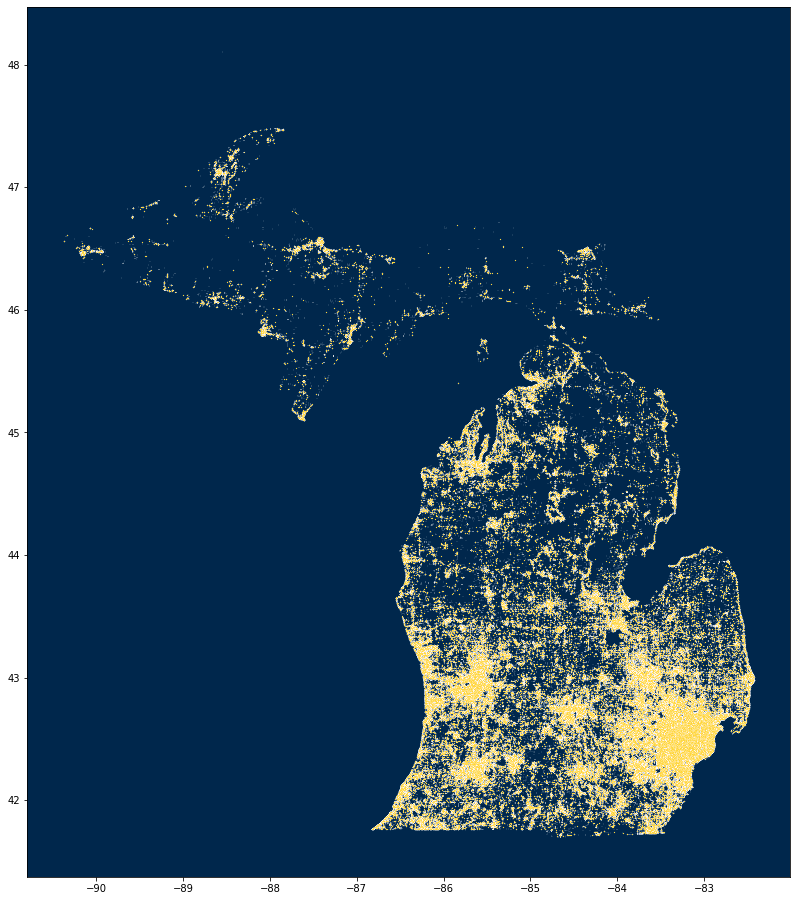

In [145]:
ookla_df.plot(figsize=(32,16), color='#FFCB05', edgecolor='white', linewidth=0.1)

In [ ]:
# mi_schools.plot(figsize=(32,16), cmap='Blues', edgecolor='white', linewidth=0.1)